In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the dataset
df=pd.read_csv("atm bank dataset.csv")
df.head()


,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [3]:
df.shape 

(2244, 11)



*   2244 rows and 11 columns




In [4]:
#for knowing statastical values
df.describe()

,id,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
count,2244.000000,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03
mean,5706.037433,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05
std,3348.296502,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05
min,11.000000,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02
25%,2816.750000,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05
50%,5664.500000,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05
75%,8447.250000,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05
max,11585.000000,7.000000,12.000000,2017.000000,1.006829e+06,1.410700e+06


In [5]:
#check the datatype of each variable
df.dtypes

id                         int64
atm_name                  object
weekday                   object
festival_religion         object
working_day               object
holiday_sequence          object
trans_date_set             int64
trans_month                int64
trans_year                 int64
prevweek_mean              int64
total_amount_withdrawn     int64
dtype: object

In [6]:
#checking null values
df.isnull().sum()

id                        0
atm_name                  0
weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64

* There is no Null values.

In [7]:
#drop 1st and 2nd column from the dataset
df = df.drop(df.columns[[0,1]], axis=1) 

In [8]:
df.head()

,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [9]:
df.columns

Index(['weekday', 'festival_religion', 'working_day', 'holiday_sequence',
       'trans_date_set', 'trans_month', 'trans_year', 'prevweek_mean',
       'total_amount_withdrawn'],
      dtype='object')

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


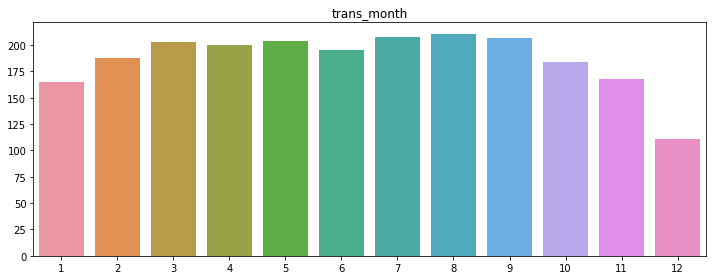

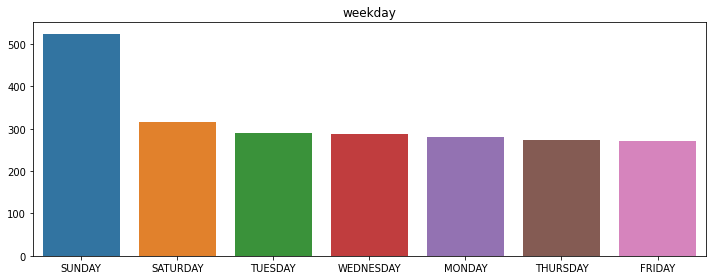

In [10]:
categorcial_variables = ['trans_month','weekday']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().index,df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()

As we can see in the bar plot, Saturdays and Sundays are the most active days to withdraw money.


In [11]:
#categorical to numerical
df=pd.get_dummies(df,columns=['weekday','festival_religion','working_day','holiday_sequence'])

In [12]:
df.shape

(2244, 27)

After OHE we have 2244 observations with 27 columns (features).

<AxesSubplot:>

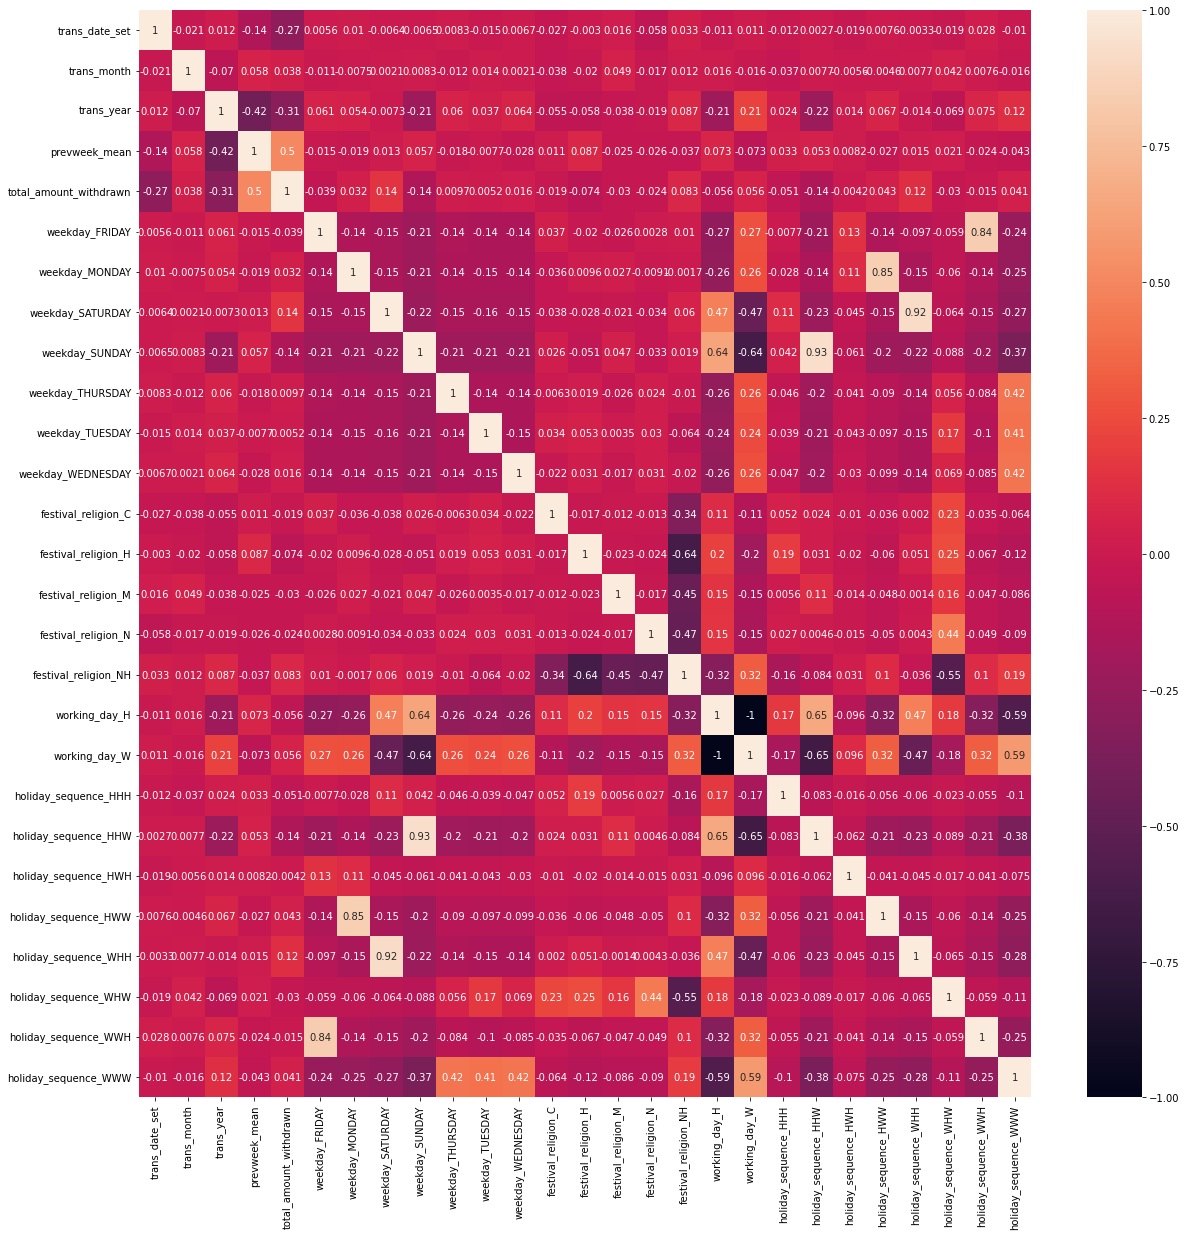

In [13]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [14]:
#selecting one feature amoung highly correlated varible
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df1 = df[selected_columns]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


In [16]:
x = df1.drop(columns = ['total_amount_withdrawn'])
y = df1['total_amount_withdrawn']

In [17]:
x = df1.drop(columns = ['total_amount_withdrawn'])
y = df1['total_amount_withdrawn']


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)



(1795, 24) (449, 24) (1795,) (449,)


#Linear Regression


In [18]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [19]:
pred=model.predict(xtest)

In [20]:
data1= pd.DataFrame({'Actual': ytest, 'Predicted': pred})
data1

,Actual,Predicted
975,282200,522948.654395
512,547800,457498.904858
458,470500,456938.252187
1958,305500,237553.958084
1697,472900,463389.429048
...,...,...
220,555600,759355.675445
111,278300,436710.543946
1329,421200,590280.618461
1568,714000,767525.096729


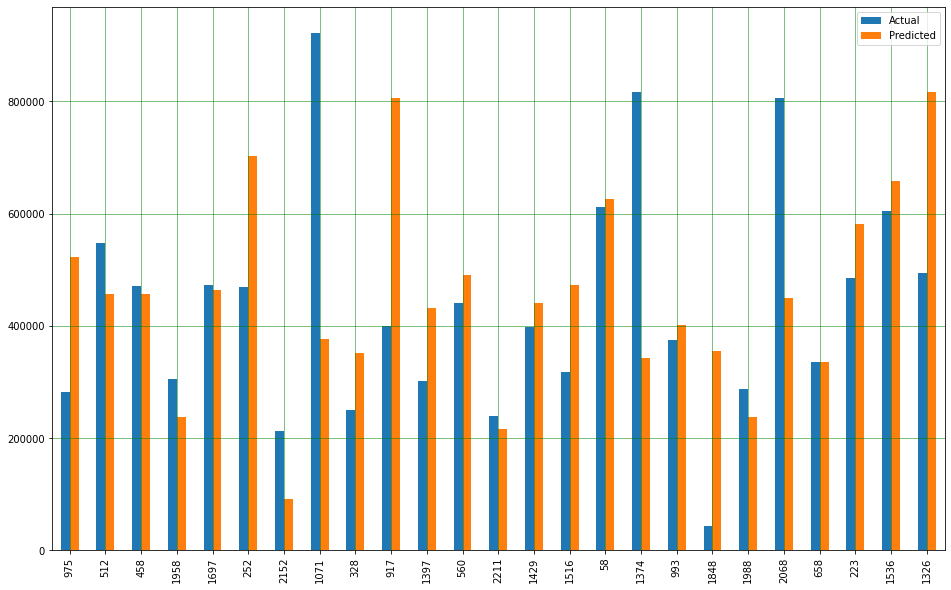

In [21]:
#plotting graph of prediction vs actual value
df1 = data1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [22]:
from sklearn import metrics
MAE_lr=metrics.mean_absolute_error(ytest,pred)
MSE_lr=metrics.mean_squared_error(ytest,pred)
RMSE_lr=np.sqrt(MSE_lr)
r2=metrics.r2_score(ytest,pred)
print(MAE_lr)
print(MSE_lr)
print(RMSE_lr)                    
print(r2)

154953.3529884664
40414349498.085365
201033.20496396947
0.34865757761496496


#XGBoost Regression

In [23]:
import xgboost as xgb

model_xgb=xgb.XGBRegressor()
model_xgb.fit(xtrain,ytrain)
pred=model_xgb.predict(xtest)

In [24]:
data2= pd.DataFrame({'Actual': ytest, 'Predicted': pred})
data2

,Actual,Predicted
975,282200,515623.750000
512,547800,516564.062500
458,470500,665807.812500
1958,305500,222482.953125
1697,472900,388199.968750
...,...,...
220,555600,438648.812500
111,278300,502319.406250
1329,421200,580896.375000
1568,714000,795011.500000


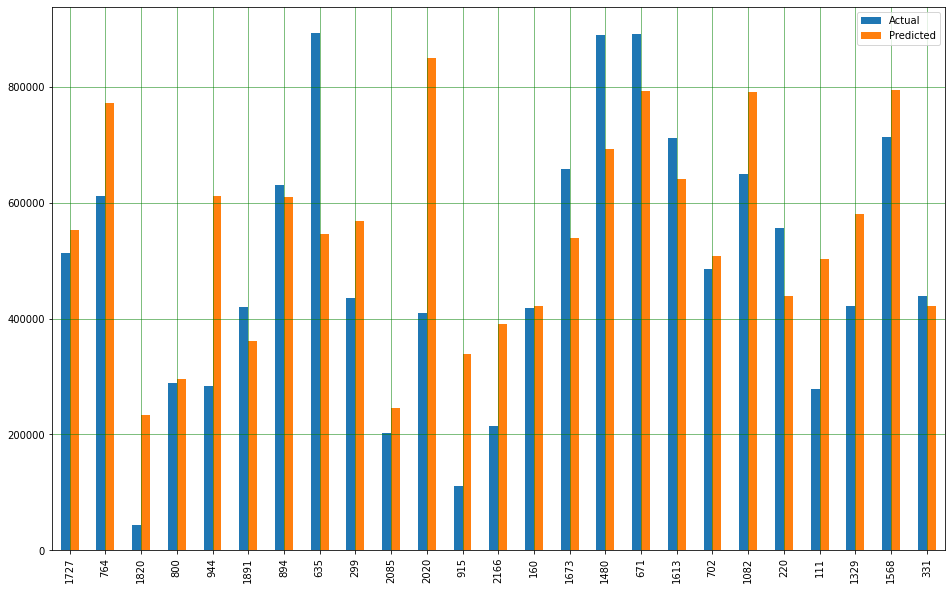

In [25]:
#predic value vs actual
df1 = data2.tail(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [26]:
from sklearn import metrics
MAE_xb=metrics.mean_absolute_error(ytest,pred)
MSE_xb=metrics.mean_squared_error(ytest,pred)
RMSE_xb=np.sqrt(MSE_xb)

print(MAE_xb)
print(MSE_xb)
print(RMSE_xb)                    


137777.5466096534
33295305549.30781
182470.0127399234


In [27]:
pip install shap --user

Note: you may need to restart the kernel to use updated packages.


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


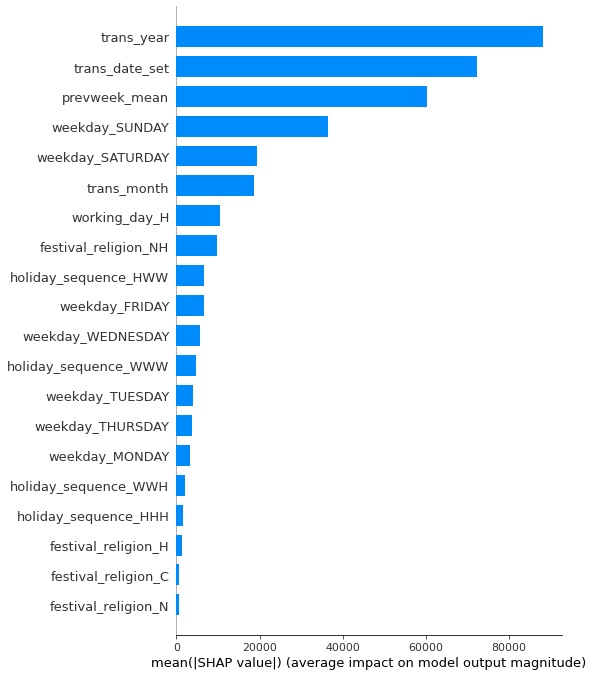

In [28]:
#feature importance
import shap
shap_values = shap.TreeExplainer(model_xgb).shap_values(xtest)
shap.summary_plot(shap_values, xtest, plot_type="bar")

#  LGBMRegressor



In [29]:
from lightgbm import LGBMRegressor

gbm=LGBMRegressor(objective='regression',num_leaves=31,random_state=42,learning_rate=.1,n_estimators=100)
gbm.fit(xtrain,ytrain,eval_set=[(xtest,ytest)],eval_metric='rmse',early_stopping_rounds=10,verbose=50)
print();
print(gbm)


LGBMRegressor(objective='regression', random_state=42)


'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


In [30]:
lgbm_predict=gbm.predict(xtest,num_iteration=gbm.best_iteration_)
data3= pd.DataFrame({'Actual': ytest, 'Predicted': lgbm_predict})
data3

,Actual,Predicted
975,282200,608818.971232
512,547800,483244.686918
458,470500,598754.038852
1958,305500,250069.943710
1697,472900,397359.784721
...,...,...
220,555600,539037.327156
111,278300,407833.745895
1329,421200,634312.023174
1568,714000,706395.763752


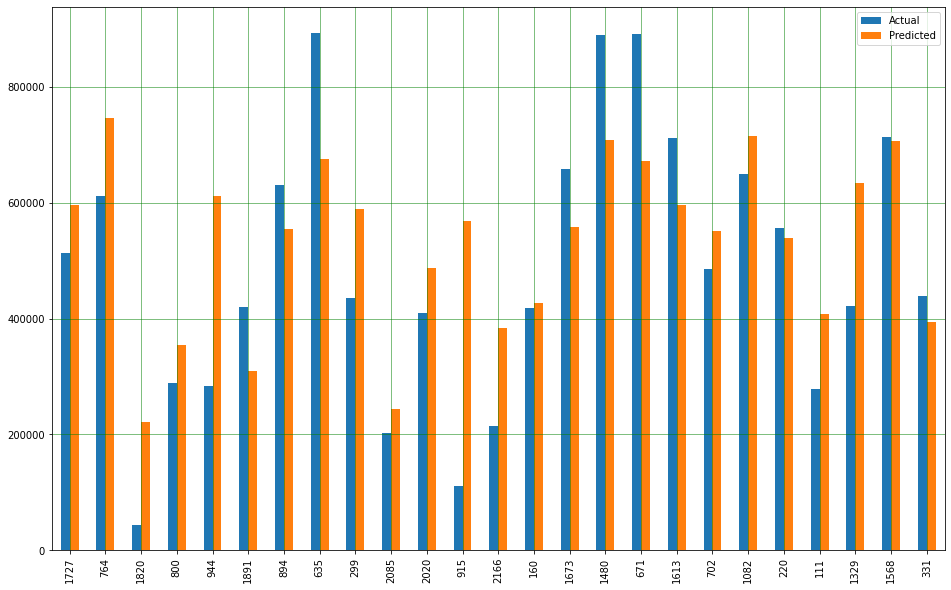

In [31]:
df1 = data3.tail(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [32]:
from sklearn import metrics
MAE_gbm=metrics.mean_absolute_error(ytest,pred)
MSE_gbm=metrics.mean_squared_error(ytest,pred)
RMSE_gbm=np.sqrt(MSE_gbm)

print(MAE_gbm)
print(MSE_gbm)
print(RMSE_gbm)                    


137777.5466096534
33295305549.30781
182470.0127399234


# ANN

In [33]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [34]:
# Initializing the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(25, activation = 'relu', input_dim = 24))
# Adding the 2 hidden layer
classifier.add(Dense(20, activation = 'relu'))
# Adding the 3 hidden layer
classifier.add(Dense(15, activation = 'relu'))
# Adding the 4 hidden layer
classifier.add(Dense(8,  activation = 'relu'))
# Adding the output layer
classifier.add(Dense(1, activation = 'linear'))
# Adding the output layer
#classifier.add(Dense(1, activation = 'linear'))
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'mse')
# Fitting the ANN to the Training set
classifier.fit(xtrain, ytrain, batch_size=100,epochs = 500)
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results
y_pred = classifier.predict(xtest)

Epoch 1/500
18/18 [==============================] - 0s 2ms/step - loss: 353203388416.0000
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 337797742592.0000
Epoch 3/500
18/18 [==============================] - 0s 2ms/step - loss: 336569827328.0000
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 336569827328.0000
Epoch 5/500
18/18 [==============================] - 0s 2ms/step - loss: 336569827328.0000
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 336569761792.0000
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 336569761792.0000
Epoch 8/500
18/18 [==============================] - 0s 2ms/step - loss: 336569794560.0000
Epoch 9/500
18/18 [==============================] - 0s 2ms/step - loss: 336569761792.0000
Epoch 10/500
18/18 [==============================] - 0s 2ms/step - loss: 334403764224.0000
Epoch 11/500
18/18 [==============================] - 0s 3ms/step - loss: 315237564416.00

Epoch 91/500
18/18 [==============================] - 0s 2ms/step - loss: 52676235264.0000
Epoch 92/500
18/18 [==============================] - 0s 2ms/step - loss: 52508971008.0000
Epoch 93/500
18/18 [==============================] - 0s 2ms/step - loss: 52203540480.0000
Epoch 94/500
18/18 [==============================] - 0s 2ms/step - loss: 52299952128.0000
Epoch 95/500
18/18 [==============================] - 0s 2ms/step - loss: 52143632384.0000
Epoch 96/500
18/18 [==============================] - 0s 2ms/step - loss: 52373934080.0000
Epoch 97/500
18/18 [==============================] - 0s 2ms/step - loss: 52470579200.0000
Epoch 98/500
18/18 [==============================] - 0s 2ms/step - loss: 52203368448.0000
Epoch 99/500
18/18 [==============================] - 0s 2ms/step - loss: 52286316544.0000
Epoch 100/500
18/18 [==============================] - 0s 2ms/step - loss: 52095086592.0000
Epoch 101/500
18/18 [==============================] - 0s 3ms/step - loss: 52130398208.00

18/18 [==============================] - 0s 2ms/step - loss: 50539974656.0000
Epoch 181/500
18/18 [==============================] - 0s 2ms/step - loss: 50013847552.0000
Epoch 182/500
18/18 [==============================] - 0s 2ms/step - loss: 49859706880.0000
Epoch 183/500
18/18 [==============================] - 0s 2ms/step - loss: 50467323904.0000
Epoch 184/500
18/18 [==============================] - 0s 2ms/step - loss: 50451423232.0000
Epoch 185/500
18/18 [==============================] - 0s 2ms/step - loss: 49837817856.0000
Epoch 186/500
18/18 [==============================] - 0s 2ms/step - loss: 49852649472.0000
Epoch 187/500
18/18 [==============================] - 0s 2ms/step - loss: 49730596864.0000
Epoch 188/500
18/18 [==============================] - 0s 2ms/step - loss: 50005413888.0000
Epoch 189/500
18/18 [==============================] - 0s 2ms/step - loss: 50162913280.0000
Epoch 190/500
18/18 [==============================] - 0s 2ms/step - loss: 50011422720.0000
Ep

18/18 [==============================] - 0s 2ms/step - loss: 50310053888.0000
Epoch 270/500
18/18 [==============================] - 0s 2ms/step - loss: 49294766080.0000
Epoch 271/500
18/18 [==============================] - 0s 2ms/step - loss: 48897282048.0000
Epoch 272/500
18/18 [==============================] - 0s 2ms/step - loss: 49389899776.0000
Epoch 273/500
18/18 [==============================] - 0s 2ms/step - loss: 48821850112.0000
Epoch 274/500
18/18 [==============================] - 0s 2ms/step - loss: 48890028032.0000
Epoch 275/500
18/18 [==============================] - 0s 2ms/step - loss: 48730300416.0000
Epoch 276/500
18/18 [==============================] - 0s 2ms/step - loss: 48933498880.0000
Epoch 277/500
18/18 [==============================] - 0s 2ms/step - loss: 48698679296.0000
Epoch 278/500
18/18 [==============================] - 0s 2ms/step - loss: 48720658432.0000
Epoch 279/500
18/18 [==============================] - 0s 2ms/step - loss: 48769605632.0000
Ep

18/18 [==============================] - 0s 2ms/step - loss: 47790948352.0000
Epoch 359/500
18/18 [==============================] - 0s 2ms/step - loss: 47547432960.0000
Epoch 360/500
18/18 [==============================] - 0s 2ms/step - loss: 47808958464.0000
Epoch 361/500
18/18 [==============================] - 0s 2ms/step - loss: 47865995264.0000
Epoch 362/500
18/18 [==============================] - 0s 2ms/step - loss: 47940542464.0000
Epoch 363/500
18/18 [==============================] - 0s 2ms/step - loss: 48374521856.0000
Epoch 364/500
18/18 [==============================] - 0s 2ms/step - loss: 47820169216.0000
Epoch 365/500
18/18 [==============================] - 0s 2ms/step - loss: 47442579456.0000
Epoch 366/500
18/18 [==============================] - 0s 2ms/step - loss: 47713685504.0000
Epoch 367/500
18/18 [==============================] - 0s 2ms/step - loss: 47405940736.0000
Epoch 368/500
18/18 [==============================] - 0s 2ms/step - loss: 47704219648.0000
Ep

18/18 [==============================] - 0s 2ms/step - loss: 47301267456.0000
Epoch 448/500
18/18 [==============================] - 0s 2ms/step - loss: 47728308224.0000
Epoch 449/500
18/18 [==============================] - 0s 2ms/step - loss: 47183966208.0000
Epoch 450/500
18/18 [==============================] - 0s 1ms/step - loss: 46920081408.0000
Epoch 451/500
18/18 [==============================] - 0s 1ms/step - loss: 48061382656.0000
Epoch 452/500
18/18 [==============================] - 0s 1ms/step - loss: 47885156352.0000
Epoch 453/500
18/18 [==============================] - 0s 2ms/step - loss: 47417712640.0000
Epoch 454/500
18/18 [==============================] - 0s 1ms/step - loss: 46862032896.0000
Epoch 455/500
18/18 [==============================] - 0s 2ms/step - loss: 47049854976.0000
Epoch 456/500
18/18 [==============================] - 0s 2ms/step - loss: 47160295424.0000
Epoch 457/500
18/18 [==============================] - 0s 1ms/step - loss: 47483854848.0000
Ep

from sklearn import metrics

MAE_NN=metrics.mean_absolute_error(ytest, y_pred)
MSE_NN=metrics.mean_squared_error(ytest, y_pred)
RMSE_NN=np.sqrt(metrics.mean_squared_error(ytest, y_pred))
print(MAE_NN)
print(MSE_NN)
print(RMSE_NN)

# comparitive analysis

In [38]:
ind=['Linear regression','XGBoost Regression','LGBMRegressor','ANN']
data={"MAE":[MAE_lr,MAE_xb,MAE_gbm,MAE_NN],"MSE":[MSE_lr,MSE_xb,MSE_gbm,MSE_NN],
      "RMSE":[RMSE_lr,RMSE_xb,RMSE_gbm,RMSE_NN]}
result=pd.DataFrame(data=data,index=ind)
result

NameError: name 'MAE_NN' is not defined